In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv("D:\\DATA_science\\DATA_science assignment\\KNN\\glass.csv")

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.groupby('Type').count()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
Type,,,,,,,,,
1,70,70,70,70,70,70,70,70,70
2,76,76,76,76,76,76,76,76,76
3,17,17,17,17,17,17,17,17,17
5,13,13,13,13,13,13,13,13,13
6,9,9,9,9,9,9,9,9,9
7,29,29,29,29,29,29,29,29,29


In [5]:
df.shape

(214, 10)

In [6]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [8]:
df1=df.copy()

In [32]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif

In [35]:
array1=df.values
X=array1[:,0:9]
Y=array1[:,9]
test = SelectKBest(score_func=mutual_info_classif, k=9)
fit = test.fit(X, Y)

set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)

[0.36  0.299 0.408 0.386 0.085 0.354 0.248 0.32  0.128]


In [36]:
from sklearn.tree import DecisionTreeClassifier
# feature extraction
model = DecisionTreeClassifier()
model.fit(X, Y)
print(model.feature_importances_)

[0.171 0.078 0.174 0.135 0.073 0.033 0.138 0.165 0.033]


In [37]:
data=df.drop(df.columns[[4,8]],axis=1)


#### To find outliers

In [9]:
from sklearn.ensemble import IsolationForest
clf=IsolationForest(random_state=10,contamination=0.02)
clf.fit(df)

IsolationForest(contamination=0.02, random_state=10)

In [10]:
y_preds_outliers=clf.predict(df1)

In [11]:
df1['scores']=clf.decision_function(df1)

In [13]:
df1['anomaly']=clf.predict(df1.iloc[:,0:10])

In [14]:
df1.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,scores,anomaly
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1,0.196756,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1,0.279665,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1,0.279394,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1,0.287379,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1,0.294245,1


In [15]:
#Print the outlier data points
df1[df1['anomaly']==-1]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,scores,anomaly
106,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2,-0.072152,-1
107,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.00,0.24,2,-0.025597,-1
163,1.51514,14.01,2.68,3.50,69.89,1.68,5.87,2.20,0.00,5,-0.048115,-1
171,1.51316,13.02,0.00,3.04,70.48,6.21,6.96,0.00,0.00,5,-0.000383,-1
184,1.51115,17.38,0.00,0.34,75.41,0.00,6.65,0.00,0.00,6,-0.014520,-1


In [46]:
df2=df1.drop(df1.index[[106,107,163,171,184,185]],axis=0)
df3=df2.drop(df2.columns[[4,8]],axis=1)


#### Grid Search for algorithm tuning

In [17]:
from sklearn.model_selection import GridSearchCV

In [67]:
array=data.values
x=array[:,0:7]
y=array[:,7]

In [68]:
n_neighbors=np.array(range(1,50))
param_grid=dict(n_neighbors=n_neighbors)

In [69]:
model=KNeighborsClassifier()
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(x,y)
print(grid.best_score_)

print(grid.best_params_)

0.6314507198228128
{'n_neighbors': 1}


## Visualizing the CV result


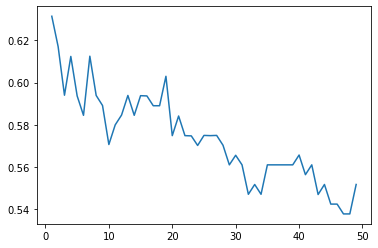

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

# choose k between 1 to 51
k_range=range(1,50)
k_scores=[]
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x,y,cv=5)
    k_scores.append(scores.mean())
    
    
# plot to see clearly
plt.plot(k_range,k_scores)
plt.xlabel=("value of k for knn")
plt.ylabel=('Cross Validated Accuracy')
plt.show()

## KNN

#### By using train test split

In [75]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)
model1=KNeighborsClassifier(n_neighbors=1)

model1.fit(x_train, y_train)
print(model1.score(x_train,y_train))
print(model1.score(x_test,y_test))

1.0
0.5348837209302325


#### By using kfold

In [72]:
#num_folds=5
kfold=KFold(n_splits=5,random_state=None)

model=KNeighborsClassifier(n_neighbors=1)
results=cross_val_score(model,x,y,cv=kfold)
print(results)
results.mean()

[0.372 0.442 0.512 0.419 0.095]


0.3678848283499446